In [ ]:
import pydicom
import json
import matplotlib.pyplot as plt

def overlay_masks(path_dicom, path_json, path_save):
    # Load the DICOM file
    ds = pydicom.dcmread(path_dicom)
    with open(path_json) as f:
        data = json.load(f)

    masks = [d["cgPoints"] for d in data]

    # Get pixel data from the DICOM image
    img = ds.pixel_array

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap="gray")

    # Draw mask coordinates
    def draw_polygon(points):
        x = [p["x"] for p in points]
        y = [p["y"] for p in points]
        # Add the first point again to close the polygon
        x.append(points[0]["x"])
        y.append(points[0]["y"])
        plt.plot(x, y, color="red")

    for mask in masks:
        draw_polygon(mask)

    # Save the rendered image
    plt.savefig(path_save)

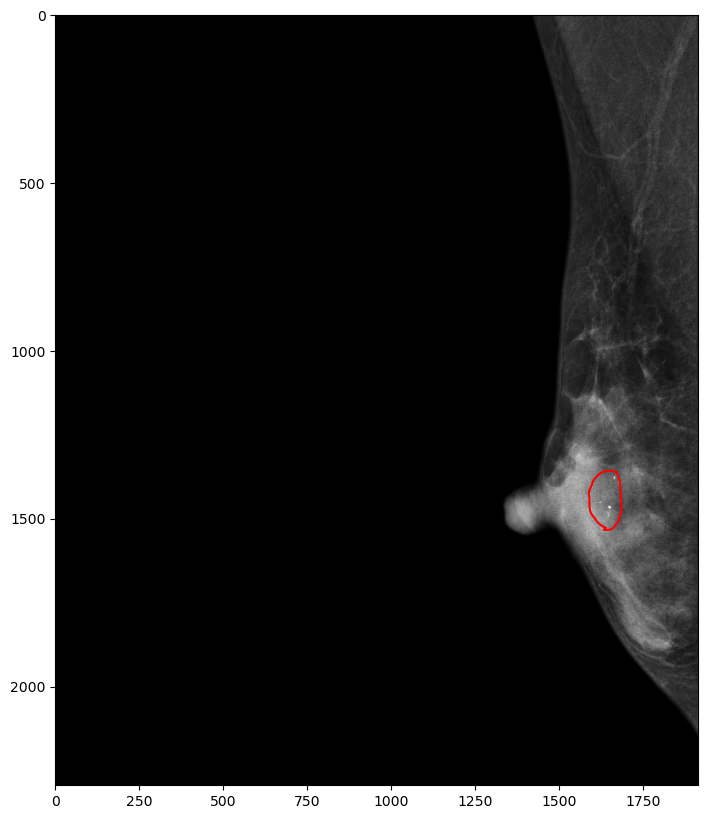

In [ ]:
path_dicom = "D1-0001_MLO_R_DicomFile.dcm"
path_json = "D1-0001_MLO_R_AnnotationFile.json"
path_save = "D1-0001_MLO_R_overlaied.png"
overlay_masks(path_dicom, path_json, path_save)

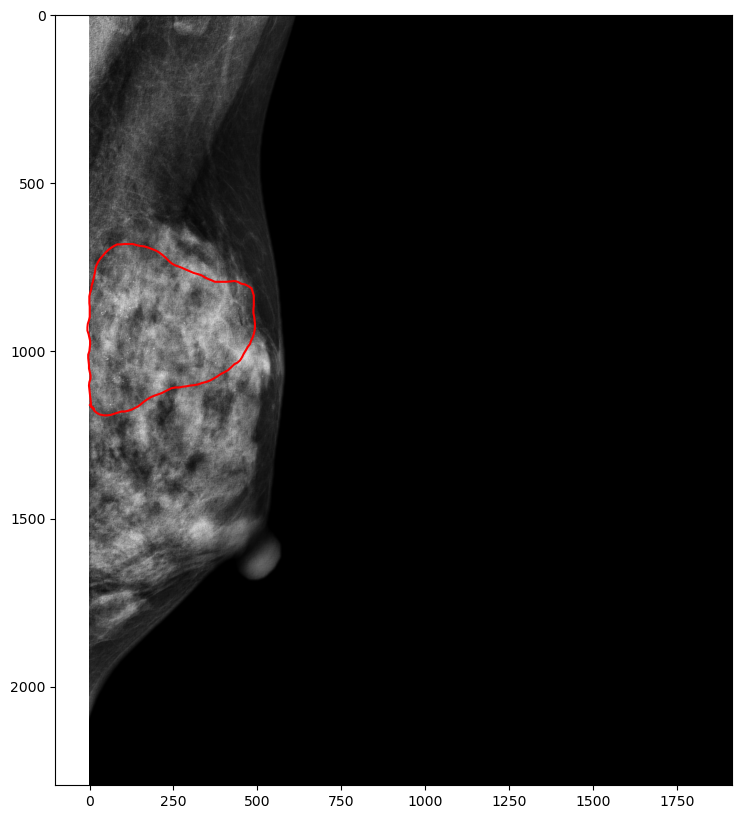

In [ ]:
path_dicom = "D1-0002_MLO_L_DicomFile.dcm"
path_json = "D1-0002_MLO_L_AnnotationFile.json"
path_save = "D1-0002_MLO_L_overlaied.png"
overlay_masks(path_dicom, path_json, path_save)